In [1]:
# run this cell and select kagge.json file downloaded

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dixitavishwasrao","key":"891907637299c19ad83193db76629716"}'}

In [2]:
# install kaggle api client

! pip install -q kaggle

In [3]:
#install api using pip installation

!mkdir -p ~/.kaggle
#
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
# creating directory and changing current working directory

!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [6]:
# searching for dataset

! kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           6948         10  0.1764706        


In [7]:
# downloading dataset and coming out of derectory

!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp
License(s): unknown
100% 690M/691M [00:32<00:00, 23.0MB/s]
100% 691M/691M [00:33<00:00, 22.0MB/s]
/content


In [8]:
# unzipping dowloaded file and remove unusale file
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense ,Dropout,Flatten,Conv2D ,MaxPool2D
from keras.optimizers import Adam

In [10]:
labels_all=pd.read_csv("dog_dataset/labels.csv")

In [11]:
labels_all.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
breeds_all=labels_all['breed']
breeds_counts=breeds_all.value_counts()
breeds_counts.head()


,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


In [13]:
CLASS_NAMES=["scottish_deerhound","maltese_dog","bernese_mountain_dog"]
labels=labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels=labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [14]:
# read the labels.csv file and checking shape and records

labels_all=pd.read_csv("dog_dataset/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [15]:
#visualize the number of each breeds

breeds_all=labels_all['breed']
breeds_counts=breeds_all.value_counts()
breeds_counts.head()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


In [16]:
# selecting first 3 breeds
CLASS_NAMES=["scottish_deerhound","maltese_dog","bernese_mountain_dog"]
labels=labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels=labels.reset_index()
labels.head()



,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [17]:
# creating numpy matrix with zeros

X_data=np.zeros((len(labels),224,224,3) ,dtype='float32')

#one hot encoding
Y_data=label_binarize(labels['breed'], classes= CLASS_NAMES)

In [18]:
# reading and converting image to numpy array and normalizing dataset

for i in tqdm(range(len(labels))):
  img=image.load_img('dog_dataset/train/%s.jpg'% labels['id'][i], target_size=(224,224))
  img=image.img_to_array(img)
  x=np.expand_dims(img.copy(),axis=0)
  X_data[i]= x/255.0

100%|██████████| 357/357 [00:00<00:00, 482.99it/s]


In [19]:
# printing train images and one hot encode shape and size

print("\nTraing Images shape :" , X_data.shape,'size:{:,}' .format(X_data.size))
print("one hot encoded output shape :" , Y_data.shape,'size:{:,}' .format(Y_data.size))


Traing Images shape : (357, 224, 224, 3) size:53,738,496
one hot encoded output shape : (357, 3) size:1,071


In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

# building the model

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# Corrected line: Using regularizers.l2(0.01) for L2 regularization
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# Corrected line: Using regularizers.l2(0.01) for L2 regularization
model.add(keras.layers.Conv2D(filters=16,kernel_size=(7,7),activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# Corrected line: Using regularizers.l2(0.01) for L2 regularization
model.add(keras.layers.Conv2D(filters=8,kernel_size=(5,5),activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())
# Corrected line: Using regularizers.l2(0.01) for L2 regularization
model.add(keras.layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
# Corrected line: Using regularizers.l2(0.01) for L2 regularization
model.add(keras.layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(len(CLASS_NAMES),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 108, 108, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 16)          │          25,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 8)           │           3,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,619 (635.23 KB)

 Trainable params: 162,619 (635.23 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# splitting the data set into training and testing data set

X_train_and_val,X_test,Y_train_and_val,Y_test=train_test_split(X_data,Y_data,test_size=0.1)

X_train,X_val,Y_train,Y_val=train_test_split(X_train_and_val,Y_train_and_val,test_size=0.2)

In [23]:
# training the model

epoch=100
batch_size=128
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epoch,validation_data=(X_val,Y_val))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.3359 - loss: 4.8928 - val_accuracy: 0.2308 - val_loss: 4.8798
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 0.3411 - loss: 4.8656 - val_accuracy: 0.2308 - val_loss: 4.8561
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.3359 - loss: 4.8398 - val_accuracy: 0.2308 - val_loss: 4.8323
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.3438 - loss: 4.8134 - val_accuracy: 0.2308 - val_loss: 4.8085
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.3516 - loss: 4.7867 - val_accuracy: 0.2308 - val_loss: 4.7843
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step - accuracy: 0.3568 - loss: 4.7618 - val_accuracy: 0.2462 - val_loss: 4.7596
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.3411 - loss: 4.7394 - val_accuracy: 0.3231 - val_loss: 4.7339
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.3854 - loss: 4.7096 - val_accuracy: 0.3231 - val

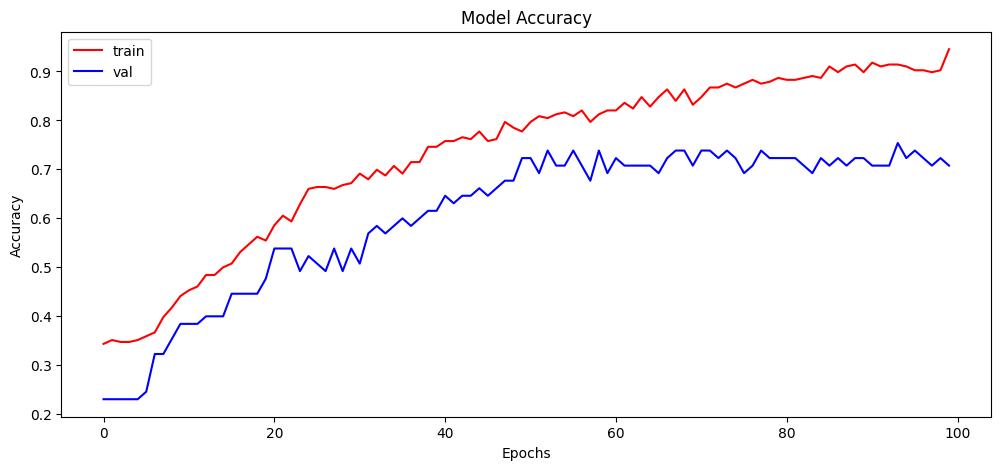

In [24]:
# ploting training history


plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [27]:
# predicting usig predict function
# predicting usig predict function
Y_pred=model.predict(X_test)
score=model.evaluate(X_test ,Y_test)
print("Accuracy over the test set: \n ", round((score[1]*100), 2),"%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 470ms/step - accuracy: 0.7685 - loss: 2.9988
Accuracy over the test set: 
  77.78 %


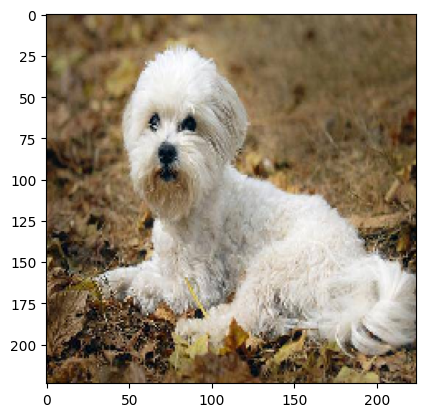

Originally : maltese_dog
Predicted : maltese_dog


In [28]:
# plotting image to compare

plt.imshow(X_test[1,:,:,:])
plt.show()


print("Originally :",labels['breed'][np.argmax(Y_test[1])])
print("Predicted :",labels['breed'][np.argmax(Y_pred[1])])

In [29]:
model.save("dog_breed.h5")